In [1]:
# import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Import file

pd.read_csv("final_data.csv")

,City,State,Latitude,Longitude,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,...,Nov_temp,Nov_precip,Nov_humid,Nov_cloud,Dec_temp,Dec_precip,Dec_humid,Dec_cloud,Region4,Region9
0,New York,New York,40.712775,-74.005973,4251,3548,3977,3818,4037,4330,...,46.2,2.8,66.21,7.5,39.6,3.7,68.37,3.1,Northeast,Middle Atlantic
1,Buffalo,New York,42.886447,-78.878369,207,179,160,159,191,170,...,36.9,4.0,59.90,28.1,33.2,3.7,62.94,26.2,Northeast,Middle Atlantic
2,Yonkers,New York,40.931210,-73.898747,59,59,58,53,60,71,...,45.6,3.0,60.94,49.8,37.5,4.7,62.89,56.6,Northeast,Middle Atlantic
3,Albany,New York,42.652579,-73.756232,54,51,66,62,70,78,...,37.8,3.4,65.85,76.6,29.5,3.3,68.30,74.4,Northeast,Middle Atlantic
4,New Rochelle,New York,40.911488,-73.782355,31,27,31,27,30,39,...,44.3,4.4,62.27,40.0,37.0,4.9,63.37,38.5,Northeast,Middle Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Bowling Green,Kentucky,36.968522,-86.480804,139,111,162,153,180,178,...,45.5,4.7,71.69,41.7,41.9,4.7,70.77,49.3,South,East South Central
828,Covington,Kentucky,39.083671,-84.508554,84,67,80,91,79,81,...,41.3,3.9,77.61,57.8,36.3,3.5,75.96,54.9,South,East South Central
829,Charleston,West Virginia,38.349820,-81.632623,49,44,73,73,80,84,...,43.3,3.0,71.94,57.9,39.1,4.2,72.53,65.8,South,South Atlantic
830,Concord,New Hampshire,43.208137,-71.537572,29,21,44,34,54,62,...,35.4,4.2,71.83,50.7,26.6,3.9,71.33,45.5,Northeast,New England


In [3]:
# Begin examining average prices (per region)

data_complete_df = pd.read_csv("final_data.csv")

In [4]:
data_complete_df.columns

Index(['City', 'State', 'Latitude', 'Longitude', '01_Avg', '02_Avg', '03_Avg',
       '04_Avg', '05_Avg', '06_Avg', '07_Avg', '08_Avg', '09_Avg', '10_Avg',
       '11_Avg', '12_Avg', 'Jan_temp', 'Jan_precip', 'Jan_humid', 'Jan_cloud',
       'Feb_temp', 'Feb_precip', 'Feb_humid', 'Feb_cloud', 'Mar_temp',
       'Mar_precip', 'Mar_humid', 'Mar_cloud', 'Apr_temp', 'Apr_precip',
       'Apr_humid', 'Apr_cloud', 'May_temp', 'May_precip', 'May_humid',
       'May_cloud', 'Jun_temp', 'Jun_precip', 'Jun_humid', 'Jun_cloud',
       'Jul_temp', 'Jul_precip', 'Jul_humid', 'Jul_cloud', 'Aug_temp',
       'Aug_precip', 'Aug_humid', 'Aug_cloud', 'Sep_temp', 'Sep_precip',
       'Sep_humid', 'Sep_cloud', 'Oct_temp', 'Oct_precip', 'Oct_humid',
       'Oct_cloud', 'Nov_temp', 'Nov_precip', 'Nov_humid', 'Nov_cloud',
       'Dec_temp', 'Dec_precip', 'Dec_humid', 'Dec_cloud', 'Region4',
       'Region9'],
      dtype='object')

In [5]:
# Calculate January sales mean (by region)

sales_avg = data_complete_df.groupby(['Region9'])['01_Avg'].mean()

In [6]:
sales_avg

Region9
East North Central    129.403226
East South Central    145.156250
Middle Atlantic       245.195122
Mountain              247.120482
New England            44.857143
Pacific               109.331707
South Atlantic        218.022059
West North Central    116.298246
West South Central    185.304762
Name: 01_Avg, dtype: float64

In [7]:
# Sort to see top 10 cities and bottom 10 cities

top_10_by_01 = data_complete_df.sort_values('01_Avg')

top_10_by_01.tail(20)

,City,State,Latitude,Longitude,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,...,Nov_temp,Nov_precip,Nov_humid,Nov_cloud,Dec_temp,Dec_precip,Dec_humid,Dec_cloud,Region4,Region9
332,Mesa,Arizona,33.415184,-111.831472,847,901,1242,1165,1228,1133,...,65.9,0.9,36.84,37.3,55.8,0.9,44.79,38.5,West,Mountain
245,Dallas,Texas,32.776664,-96.796988,856,938,1266,1279,1441,1392,...,56.1,1.7,64.41,49.8,49.9,3.4,63.51,52.1,South,West South Central
420,Columbus,Ohio,39.961176,-82.998794,859,787,1145,1117,1342,1407,...,39.9,4.1,73.09,67.5,34.2,2.7,75.58,66.0,Midwest,East North Central
488,Denver,Colorado,39.739236,-104.990251,880,972,1249,1397,1557,1545,...,40.1,0.5,55.29,52.2,33.4,0.1,48.29,54.9,West,Mountain
331,Tucson,Arizona,32.222607,-110.974711,932,1048,1307,1364,1555,1448,...,62.9,0.9,36.48,8.2,53.6,0.9,46.47,16.6,West,Mountain
357,Orlando,Florida,28.538335,-81.379237,940,934,1197,1234,1216,1258,...,69.1,1.0,75.59,37.1,65.1,2.3,75.88,41.9,South,South Atlantic
14,San Diego,California,32.715738,-117.161084,959,1030,1341,1423,1587,1588,...,63.8,1.1,65.64,54.6,59.0,2.2,62.86,52.9,West,Pacific
624,Atlanta,Georgia,33.748995,-84.387982,965,1048,1368,1303,1497,1415,...,51.2,3.8,73.49,48.8,47.2,6.6,73.23,58.6,South,South Atlantic
247,Fort Worth,Texas,32.755488,-97.330766,1035,1067,1344,1437,1652,1548,...,55.9,1.2,63.93,37.0,49.1,2.9,64.08,41.1,South,West South Central
542,Baltimore,Maryland,39.290385,-76.612189,1152,968,1097,1106,1091,1358,...,47.2,3.6,59.76,0.2,41.0,3.7,62.63,0.3,South,South Atlantic


In [8]:
# Check July to compare

top_10_by_07 = data_complete_df.sort_values('07_Avg')

top_10_by_07.tail(20)

,City,State,Latitude,Longitude,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,...,Nov_temp,Nov_precip,Nov_humid,Nov_cloud,Dec_temp,Dec_precip,Dec_humid,Dec_cloud,Region4,Region9
489,Colorado Springs,Colorado,38.833882,-104.821363,704,675,908,951,1152,1236,...,39.3,0.7,51.20,26.4,32.3,0.2,45.74,30.6,West,Mountain
331,Tucson,Arizona,32.222607,-110.974711,932,1048,1307,1364,1555,1448,...,62.9,0.9,36.48,8.2,53.6,0.9,46.47,16.6,West,Mountain
357,Orlando,Florida,28.538335,-81.379237,940,934,1197,1234,1216,1258,...,69.1,1.0,75.59,37.1,65.1,2.3,75.88,41.9,South,South Atlantic
624,Atlanta,Georgia,33.748995,-84.387982,965,1048,1368,1303,1497,1415,...,51.2,3.8,73.49,48.8,47.2,6.6,73.23,58.6,South,South Atlantic
245,Dallas,Texas,32.776664,-96.796988,856,938,1266,1279,1441,1392,...,56.1,1.7,64.41,49.8,49.9,3.4,63.51,52.1,South,West South Central
420,Columbus,Ohio,39.961176,-82.998794,859,787,1145,1117,1342,1407,...,39.9,4.1,73.09,67.5,34.2,2.7,75.58,66.0,Midwest,East North Central
488,Denver,Colorado,39.739236,-104.990251,880,972,1249,1397,1557,1545,...,40.1,0.5,55.29,52.2,33.4,0.1,48.29,54.9,West,Mountain
14,San Diego,California,32.715738,-117.161084,959,1030,1341,1423,1587,1588,...,63.8,1.1,65.64,54.6,59.0,2.2,62.86,52.9,West,Pacific
246,Austin,Texas,30.267153,-97.743061,820,984,1247,1378,1624,1585,...,59.5,1.0,67.89,48.9,52.7,3.7,66.90,44.7,South,West South Central
247,Fort Worth,Texas,32.755488,-97.330766,1035,1067,1344,1437,1652,1548,...,55.9,1.2,63.93,37.0,49.1,2.9,64.08,41.1,South,West South Central


In [13]:
count_cols = ['01_Avg', '02_Avg', '03_Avg','04_Avg', '05_Avg', '06_Avg', '07_Avg', '08_Avg', '09_Avg', '10_Avg','11_Avg', '12_Avg']
data_complete_df [count_cols].std(axis=1)

0      342.166183
1       18.971070
2       10.013249
3        8.701707
4        7.465070
          ...    
827     25.054335
828      8.458007
829     12.047884
830     13.612327
831     11.207411
Length: 832, dtype: float64

In [16]:
data_complete_df['Sale Count STD'] = data_complete_df [count_cols].std(axis=1)

In [17]:
data_complete_df

,City,State,Latitude,Longitude,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,...,Nov_humid,Nov_cloud,Dec_temp,Dec_precip,Dec_humid,Dec_cloud,Region4,Region9,Price STD,Sale Count STD
0,New York,New York,40.712775,-74.005973,4251,3548,3977,3818,4037,4330,...,66.21,7.5,39.6,3.7,68.37,3.1,Northeast,Middle Atlantic,342.166183,342.166183
1,Buffalo,New York,42.886447,-78.878369,207,179,160,159,191,170,...,59.90,28.1,33.2,3.7,62.94,26.2,Northeast,Middle Atlantic,18.971070,18.971070
2,Yonkers,New York,40.931210,-73.898747,59,59,58,53,60,71,...,60.94,49.8,37.5,4.7,62.89,56.6,Northeast,Middle Atlantic,10.013249,10.013249
3,Albany,New York,42.652579,-73.756232,54,51,66,62,70,78,...,65.85,76.6,29.5,3.3,68.30,74.4,Northeast,Middle Atlantic,8.701707,8.701707
4,New Rochelle,New York,40.911488,-73.782355,31,27,31,27,30,39,...,62.27,40.0,37.0,4.9,63.37,38.5,Northeast,Middle Atlantic,7.465070,7.465070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Bowling Green,Kentucky,36.968522,-86.480804,139,111,162,153,180,178,...,71.69,41.7,41.9,4.7,70.77,49.3,South,East South Central,25.054335,25.054335
828,Covington,Kentucky,39.083671,-84.508554,84,67,80,91,79,81,...,77.61,57.8,36.3,3.5,75.96,54.9,South,East South Central,8.458007,8.458007
829,Charleston,West Virginia,38.349820,-81.632623,49,44,73,73,80,84,...,71.94,57.9,39.1,4.2,72.53,65.8,South,South Atlantic,12.047884,12.047884
830,Concord,New Hampshire,43.208137,-71.537572,29,21,44,34,54,62,...,71.83,50.7,26.6,3.9,71.33,45.5,Northeast,New England,13.612327,13.612327


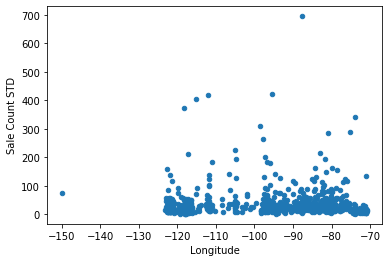

In [18]:
# Examine the volatility between longitude and Sale Count by comparing the std. deviation and sale count.

data_complete_df.plot(x = 'Longitude', y = 'Sale Count STD', kind = 'scatter')